In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (twitter_consumer_key, twitter_consumer_secret, twitter_access_token, twitter_access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [59]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# List for dictionaries of results
results_list = []

# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Counter
    counter = 1

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Username": user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

In [60]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments).set_index("Username")
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago
Username,,,,,,,
@BBC,0.0000,Sun Apr 01 20:38:27 +0000 2018,0.000,1.000,0.000,RT @BBCOne: CANNOT WAIT. \n\n@masterchefuk #M...,1
@BBC,-0.8750,Sun Apr 01 19:00:28 +0000 2018,0.333,0.667,0.000,Heiress Rachel Argyll is murdered at her famil...,2
@BBC,0.7644,Sun Apr 01 18:00:27 +0000 2018,0.000,0.752,0.248,The Generation Game is back! Mel Giedroyc and ...,3
@BBC,0.6114,Sun Apr 01 17:42:22 +0000 2018,0.000,0.637,0.363,RT @BBCSport: Happy April Fool's Day everyone!...,4
@BBC,0.6369,Sun Apr 01 17:00:26 +0000 2018,0.000,0.704,0.296,🤖 Who'd love their next takeaway to be deliver...,5


In [61]:
sentiments_pd.shape

(500, 7)

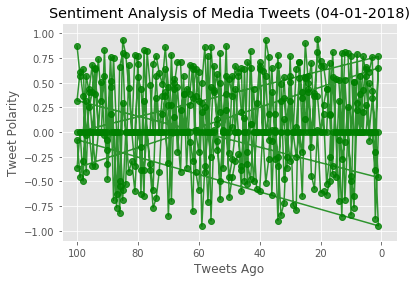

In [62]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
colors = ("red", "orage", "yellow", "green", "blue")
plt.plot(x_vals, y_vals, marker="o", color = "green", alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim(105, -5)
plt.ylim(-1.1, 1.1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [ ]:
plt.scatter(sentiments_df['lat'], hot_cities, marker="o", facecolors='red', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], warm_cities, marker="o", facecolors='orange', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cool_cities, marker="o", facecolors='lightblue', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cold_cities, marker="o", facecolors='darkblue', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cold_cities, marker="o", facecolors='darkblue', edgecolors="black", alpha=1)